In [76]:
import os
import sys
sys.path.append('./src')
import numpy as np
import matplotlib.pyplot as plt

# single solve no f_ext
no_fext_path = "stats/no_fext/043854"

# single solve with f_ext (100, 0, -100)
f_ext_path = "stats/single/050355"


# batch of 64 solves with f_ext (100, 0, -100)
batch_path = "stats/060356"

# delta_ts = np.load(f"{path}_delta_ts.npy")
# tracking_errors = np.load(f"{path}_tracking_errors.npy")
# ee_positions = np.load(f"{path}_ee_positions.npy")
# joint_positions = np.load(f"{path}_joint_positions.npy")
# solve_times = np.load(f"{path}_solve_times.npy")



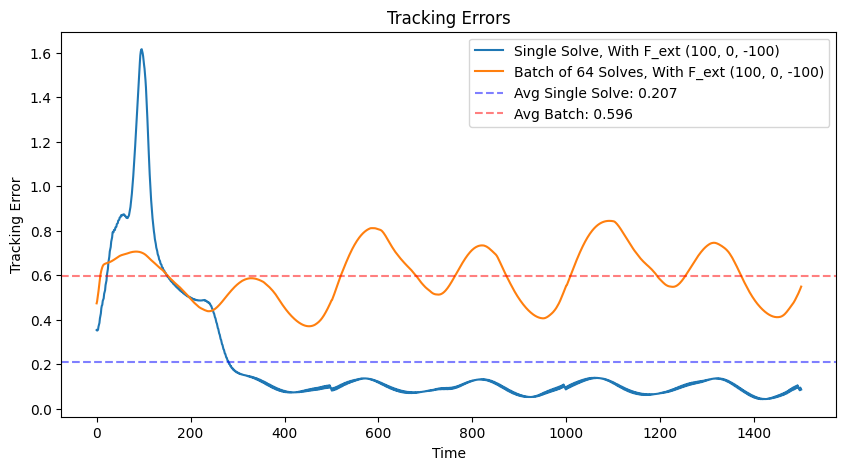

In [77]:
#no_fext_tracking_errors = np.load(f"{no_fext_path}_tracking_errors.npy")
f_ext_tracking_errors = np.load(f"{f_ext_path}_tracking_errors.npy")
batch_tracking_errors = np.load(f"{batch_path}_tracking_errors.npy")

# plot tracking errors
plt.figure(figsize=(10, 5))
#plt.plot(no_fext_tracking_errors, label='Single Solve, No F_ext')
plt.plot(f_ext_tracking_errors, label='Single Solve, With F_ext (100, 0, -100)')
plt.plot(batch_tracking_errors, label='Batch of 64 Solves, With F_ext (100, 0, -100)')

# Calculate and plot average solve time
f_ext_avg = np.mean(f_ext_tracking_errors)
batch_avg = np.mean(batch_tracking_errors)
plt.axhline(y=f_ext_avg, color='b', linestyle='--', alpha=0.5, label=f'Avg Single Solve: {f_ext_avg:.3f}')
plt.axhline(y=batch_avg, color='r', linestyle='--', alpha=0.5, label=f'Avg Batch: {batch_avg:.3f}')


plt.title("Tracking Errors")
plt.xlabel("Time")
plt.ylabel("Tracking Error")
plt.legend()
plt.show()

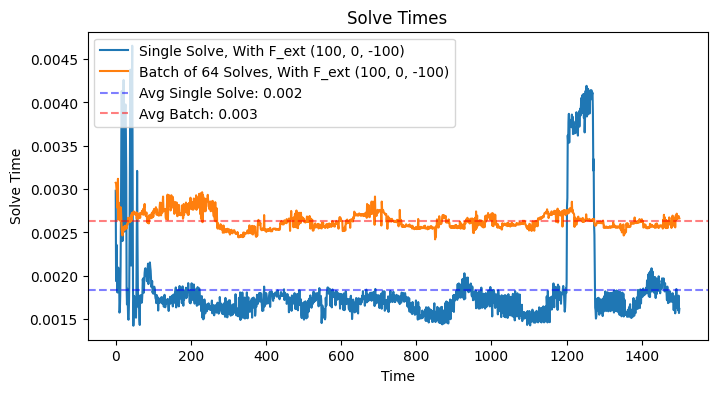

In [78]:
# f_ext_delta_ts = np.load(f"{f_ext_path}_delta_ts.npy")
# batch_delta_ts = np.load(f"{batch_path}_delta_ts.npy")

# # plot delta_ts
# plt.figure(figsize=(8, 4))
# plt.plot(f_ext_delta_ts, label='Single Solve, With F_ext (100, 0, -100)')
# plt.plot(batch_delta_ts, label='Batch of 64 Solves, With F_ext (100, 0, -100)')
# plt.title("Delta_ts")
# plt.xlabel("Time")
# plt.ylabel("Delta_t")
# plt.legend()
# plt.show()

# ----- plot solve times -----
f_ext_solve_times = np.load(f"{f_ext_path}_solve_times.npy")
batch_solve_times = np.load(f"{batch_path}_solve_times.npy")

plt.figure(figsize=(8, 4))
plt.plot(f_ext_solve_times, label='Single Solve, With F_ext (100, 0, -100)')
plt.plot(batch_solve_times, label='Batch of 64 Solves, With F_ext (100, 0, -100)')

# Calculate and plot average solve time
f_ext_avg = np.mean(f_ext_solve_times)
batch_avg = np.mean(batch_solve_times)
plt.axhline(y=f_ext_avg, color='b', linestyle='--', alpha=0.5, label=f'Avg Single Solve: {f_ext_avg:.3f}')
plt.axhline(y=batch_avg, color='r', linestyle='--', alpha=0.5, label=f'Avg Batch: {batch_avg:.3f}')

plt.title("Solve Times")
plt.xlabel("Time")
plt.ylabel("Solve Time")
plt.legend()
plt.show()


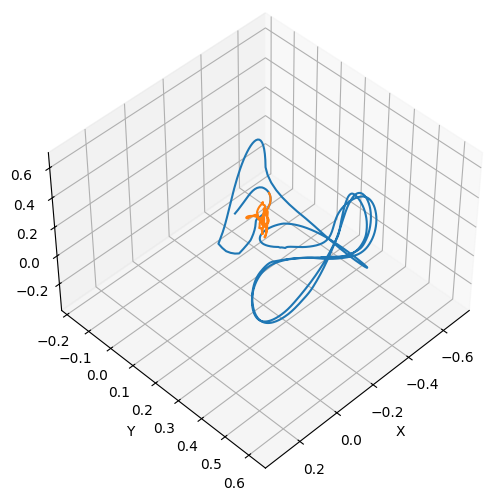

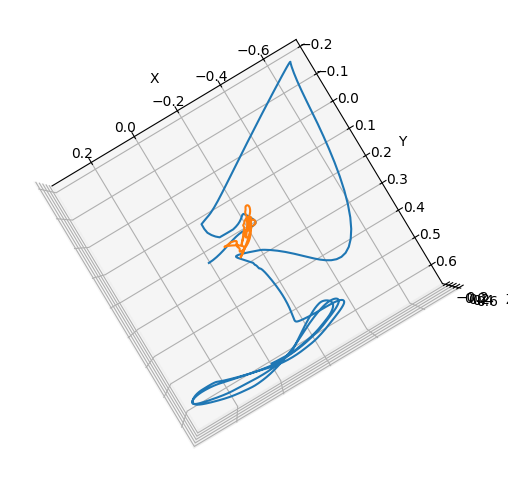

In [79]:
# plot ee positions in 3d
f_ext_ee_positions = np.load(f"{f_ext_path}_ee_positions.npy")
batch_ee_positions = np.load(f"{batch_path}_ee_positions.npy")

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(f_ext_ee_positions[:, 0], f_ext_ee_positions[:, 1], f_ext_ee_positions[:, 2])
ax.plot(batch_ee_positions[:, 0], batch_ee_positions[:, 1], batch_ee_positions[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y') 
ax.set_zlabel('Z')
ax.view_init(45,45)
plt.show()

# show from different angles
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(f_ext_ee_positions[:, 0], f_ext_ee_positions[:, 1], f_ext_ee_positions[:, 2])
ax.plot(batch_ee_positions[:, 0], batch_ee_positions[:, 1], batch_ee_positions[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(90, 60)
plt.show()



In [57]:
# MAKE SURE THESE ARE CORRECT
A_x = 0.35
A_z = 0.35
offset = [0.0, 0.55, 0.45]
period = 5
dt = 0.03

def figure8(A_x=A_x, A_z=A_z, offset=offset, period=period, dt=dt, cycles=1):
    x = lambda t: offset[0] + A_x * np.sin(t)  # X goes from -xamplitude to xamplitude
    y = lambda t: offset[1]
    z = lambda t: offset[2] + A_z * np.sin(2*t)/2 + A_z/2  # Z goes from -zamplitude/2 to zamplitude/2
    
    timesteps = np.linspace(0, 2*np.pi, int(period/dt))
    fig_8 = np.array([[x(t), y(t), z(t), 0.0, 0.0, 0.0] for t in timesteps]).reshape(-1)
    return np.tile(fig_8, cycles)

In [37]:

from utils import *
import pinocchio as pin
from pinocchio.visualize import MeshcatVisualizer
import meshcat.geometry as g
import meshcat.transformations as tf

model_dir = "description/"
urdf_path = model_dir + "indy7.urdf"
model, visual_model, collision_model = load_robot_model(urdf_path, model_dir)

viz = MeshcatVisualizer(model, collision_model, visual_model)
viz.initViewer(open=True)
viz.loadViewerModel(rootNodeName="robot1")#  , color=[0.0, 0.0, 0.0, 0.0])

fig_8_traj = figure8()

for i in range(int(len(fig_8_traj)/6)):
    viz.viewer[f'point{i}'].set_object(
        g.Sphere(0.02), 
        g.MeshLambertMaterial(color=0xff0000))
    T = tf.translation_matrix(np.array(fig_8_traj[6*i:6*(i+1)][:3]))
    viz.viewer[f'point{i}'].set_transform(T)
    
while True:
    viz.play(q_trajectory=joint_positions, dt=0.03)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7015/static/


KeyboardInterrupt: 